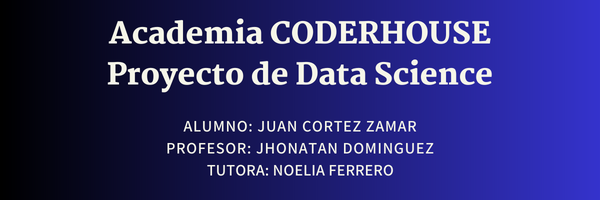

# I) <u>*Abstract*</u>

La industria hotelera es una aventura empresarial para el propietario y una odisea para el viajero y/o turista. Un cliente puede pasar horas en la búsqueda de una habitación de hotel para pasar la noche si no ha hecho planes adecuados con el sistema existente. A través de estudio, se observó que, para que un cliente tenga garantizada una habitación, tiene que acudir físicamente al hotel, ya que los recepcionistas prestan más atención a eso. También podía enviar a un amigo o pariente que viva cerca del hotel para que haga la reserva por él.
Se planteó crear un sistema de reservas en línea que permitiera a los clientes elegir la habitación que deseaban tras una visita virtual que le garantizara una habitación.
Los canales de reserva de hoteles en línea han cambiado radicalmente las posibilidades de reserva y el comportamiento de los clientes. Un número significativo de reservas de hotel se anulan por cancelaciones o por no presentarse. Los motivos típicos de las anulaciones son cambios de planes, conflictos de horarios, etc. A menudo, esto se ve facilitado por la posibilidad de hacerlo de forma gratuita o, preferiblemente, a bajo coste, lo cual es beneficioso para los clientes del hotel, pero supone un factor menos deseable y que posiblemente disminuya los ingresos con los que tienen que lidiar los hoteles.





#II) OBJETIVO
Reducir las cancelaciones de las reservas y predecir las tendencias de las nuevas reservas en respuesta a la campaña de marketing

#III) PLANTEO DE PROBLEMAS

*   Comprobar cuantas reservas se concretaron en los años 2017 y 2018.
*   Verificar la situación de las reservas en los años mencionados.


*   Estudiar si los factores monetarios del precio medio por habitación incide en la concertación de las reservas.
*   Estudiar si el lead_time influye en la tasa de cancelación.


*   analizar en qué mes o meses ocurre la mayor tasa de reservas canceladas.
*   Ver en qué segmento o por dónde realizan las reservas los clientes.

*   Estudiar si las solicitudes especiales influyeron en la concretación de reservas












#IV) CONTEXTO COMERCIAL
Estamos estudiando las reservas del Hotel X del sector hotelero donde ofrece diferentes tipos de cuartos para adultos y para familia, estacionamiento, diferentes planes de comida y requerimientos especiales. Disponemos de una base de datos de las reservas ya sea canceladas y no canceladas, fechas de entrada y salida, cantidad de adultos y niños y gastos de estadías.

#V) PROBLEMA COMERCIAL
El objetivo es reducir la tasa de cancelaciones de las reservas del Hotel X identificando los factores que influyen en nuestros clientes a la hora de realizar las reservas con la información que disponemos. En lo posible tratar de identificar los patrones que causan y conseguir cumplir el objetivo mediante campañas de marketing personalizadas respaldadas por los datos.

#VI) CONTEXTO ANALÍTICO
Para empezar nuestro problema comercial, utilizaremos un enfoque analítico que tenga en cuenta diferentes factores como tiempo de anticipación de reserva, cantidad de noches, etc., que influyen en los comportamientos de nuestros clientes con el fin de identificar patrones de comportamiento que nos permita reorientar nuestras estrategias comerciales. Utilizaremos las técnicas de EDA y ML para explorar las relaciones entre los distintos factores con respecto a las reservas, con el fin de predecir la tasa de cancelación de reserva y evaluar el impacto.

# VII) DATASET: "*HOTEL RESERVATION*"



*   Fue extraído de la página Kaggle: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset


COLUMN | DESCRIPTION | DATATYPE
--- | --- | ---
Booking_ID | Unique identifier of each booking | String
no_of_adults | Number of adults | Integer
no_of_children | Number of Children | Integer
no_of_weekend_nights | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | Integer
no_of_week_nights | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | Integer
type_of_meal_plan | Type of meal plan booked by the customer | String
required_car_parking_space | Does the customer require a car parking space? (0 - No, 1- Yes) | Integer
room_type_reserved | Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels. | String
lead_time | Number of days between the date of booking and the arrival date | Integer
arrival_year | Year of arrival date | Integer
arrival_month | Month of arrival date | Integer
arrival_date | Date of the month | Integer
market_segment_type | Market segment designation. | String
repeated_guest | Is the customer a repeated guest? (0 - No, 1- Yes) | Integer
no_of_previous_cancellations | Number of previous bookings that were canceled by the customer prior to the current booking | Integer
no_of_previous_bookings_not_canceled | Number of previous bookings not canceled by the customer prior to the current booking | Integer
avg_price_per_room | Average price per day of the reservation; prices of the rooms are dynamic. (in euros) | Decimal
no_of_special_requests | Total number of special requests made by the customer (e.g. high floor, view from the room, etc) | Integer
booking_status | Flag indicating if the booking was canceled or not. |  String


**Key columns**

* no_of_adults
* no_of_children
* no_of_week_nights
* no_of_weekend_nights
* room_type_reserved
* lead_time
* arrival_month
* arrival_date
* repeated_guest
* avg_price_per_room
* no_of_special_requests

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/archivosCSV'

Mounted at /content/drive
/content/drive/MyDrive/archivosCSV


## **Librerías**

In [ ]:
# --------- General Data Science Libraries ------
import pandas as pd
import numpy as np
# --------- Visualization Libraries ---------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# --------- Machine Learning Libraries ---------
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif as mu_clsf
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
#Instalo la librería de scikit-plot
!pip install scikit-plot
#importo la librería que previamente lo instalé
import scikitplot as skplt

In [ ]:
#Guardo el archivo dataset .csv en la variable df_hotel
df_hotel = pd.read_csv('Hotel-Reservations.csv')
df_hotel

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

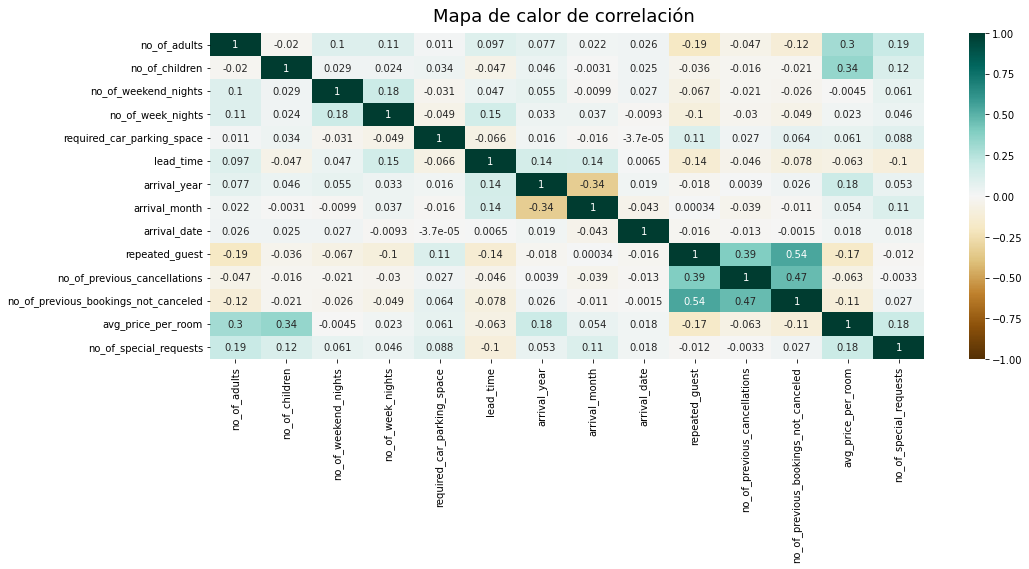

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_hotel.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlación ', fontdict={'fontsize':18}, pad=12);

# VIII) **Exploratory Data Analysis**

## Data Cleaning: Análisis de nulos



In [ ]:
df_hotel.isna().sum().sort_values(ascending = False)

Booking_ID                              0
arrival_month                           0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_year                            0
no_of_adults                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
no_of_children                          0
booking_status                          0
dtype: int64



*   **Conclusión:** De acuerdo a los resultados, no se observan datos nulos en ninguna de las columnas



## Exploratory Data Analysis (EDA): **Variables Categóricas**



In [ ]:
#Guardo el archivo .csv en la variable df_hotel_1 para realizar los tratamientos sobre los datos
df_hotel_1 = pd.read_csv('Hotel-Reservations.csv')


*   Elimino una columna "Booking_ID" que no es de interés para los siguientes pasos que voy a realizar.

In [ ]:
#Elimino una columna Booking_ID ya que no me sirve
df_hotel_1.drop(columns = ['Booking_ID'], inplace = True)

In [ ]:
# Se mostrará la tabla con sus columnas excepto la columna Booking_ID que ha sido borrada
df_hotel_1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
#Realizo el análisis de EDA para variables categóricos
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

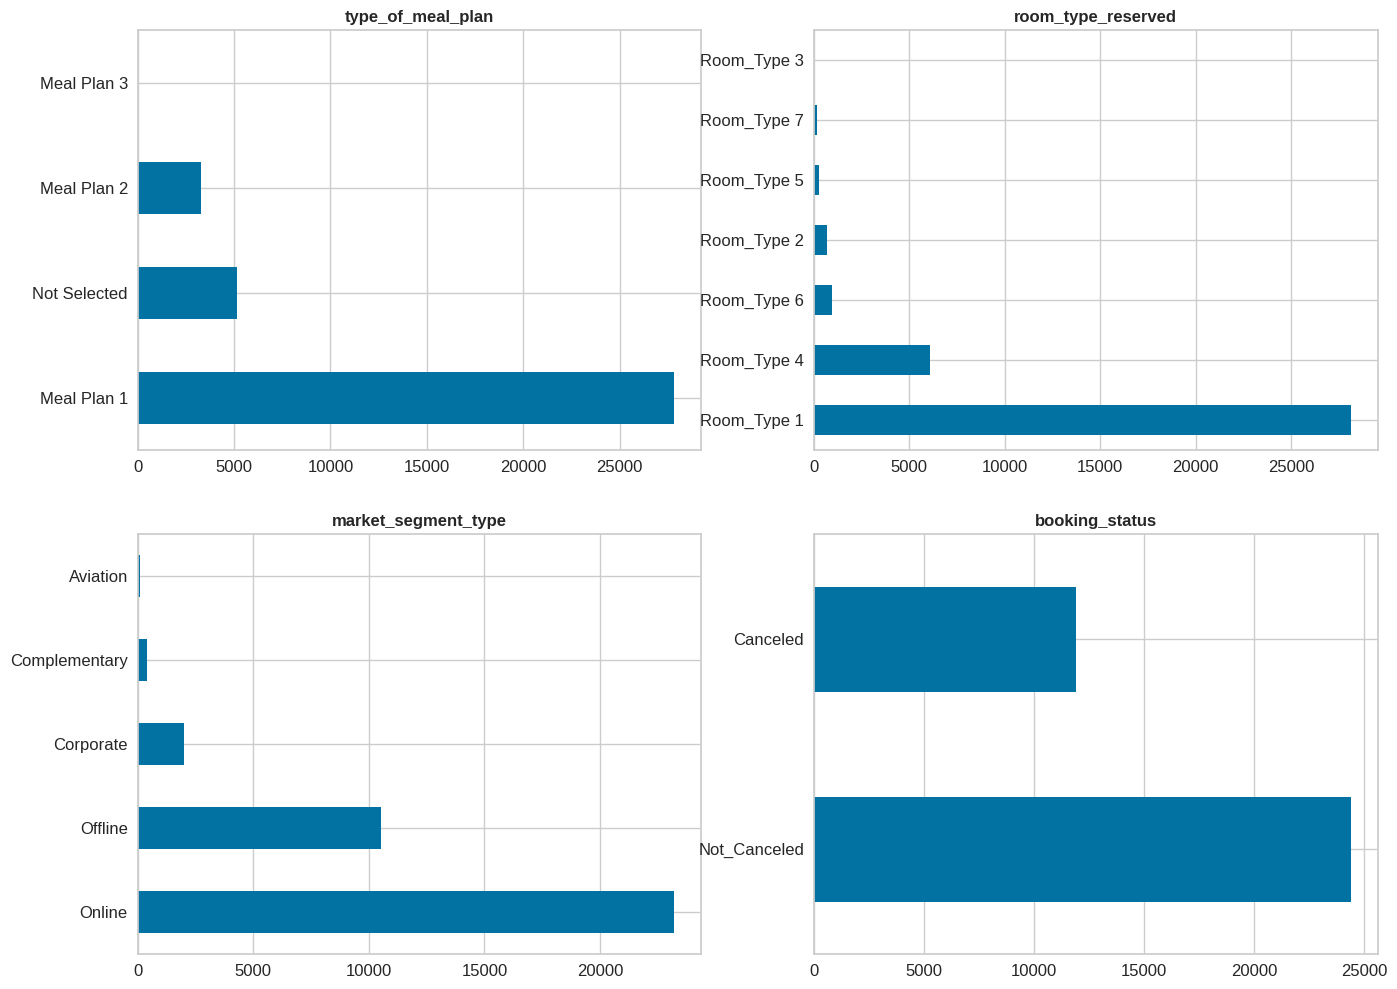

In [ ]:
graficos_eda_categoricos(df_hotel_1.select_dtypes('O'))


**Conclusión:**
*   **Booking Status:** Se observa un mayor proporción de reservas no canceladas con respecto a la proporción de reservas canceladas

*   **Market Segment Type:** Se observa que la mayoría de las reservas se realizan de manera online.

*   **Room Type Reserved:** La mayoría de los clientes reservan las habitaciones de tipo 1

*   **Type of meal plan:** La mayoría de los clientes reservan el plan de comida tipo 1

## Exploratory Data Analysis (EDA): **Variables Numéricas**



In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(df_hotel.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,2.00,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.00,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,1.00,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,2.00,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.00,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,57.00,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,2018.00,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,8.00,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,16.00,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.00,0.158053,0.0,0.0,0.00,0.0,1.0


**Conclusión:** Se oberva que la variable **lead_time** posee valores extremos u outliers, además posee una desviación estándar (std) muy alta, la cual es necesario realizar tratamiento sobre los datos.

## **Label Encoding** para variable booking_status

In [ ]:
# Aplico label encoding a la variable booking_status para categorizarlo
df_hotel_1['booking_status'] = df_hotel_1['booking_status'].astype('category')
df_hotel_1.dtypes

no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                         object
required_car_parking_space                 int64
room_type_reserved                        object
lead_time                                  int64
arrival_year                               int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                       object
repeated_guest                             int64
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                          category
dtype: object

In [ ]:
# Guardo la columna categorizada en la variable booking_status_cat y luego realizo la unión a la tabla
df_hotel_1['booking_status_cat'] = df_hotel_1['booking_status'].cat.codes
df_hotel_1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_cat
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,0


In [ ]:
#Borro la columna booking_status y me quedo con la columna categorizada booking_status_cat
df_hotel_1.drop(columns = ['booking_status'], inplace = True)
df_hotel_1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_cat
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


## Detección de Outliers
Para **lead_time:**

Como apliqué label encoding a la variable booking_status_cat, la cual **"Not_Canceled" es 1** y **"Canceled" es 0**, usaremos el df_hotel_1 para realizar la detección de ouliers en "lead_time"

<Axes: xlabel='booking_status_cat', ylabel='lead_time'>

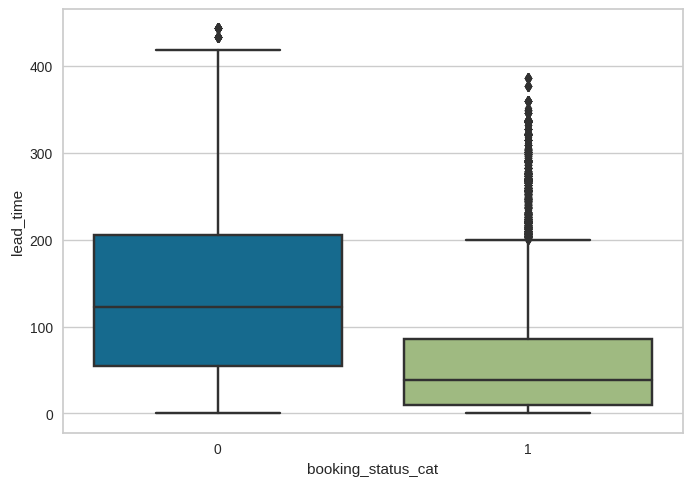

In [ ]:
#Grafico de boxplot para la variable lead_time con sus valores outliers antes de realizar tratamiento de datos sobre esta variable
tiempo_reserva = sns.boxplot(df_hotel_1, x='booking_status_cat', y="lead_time")
tiempo_reserva

In [ ]:
#Z-scores se utilizan comúnmente para identificar valores extremos o atípicos en un conjunto de datos
#Aplico la fórmula de Z score para la reducción de valores extremos
z_scores_lead_time = (df_hotel_1['lead_time'] - df_hotel_1['lead_time'].mean()) / df_hotel_1['lead_time'].std()
z_scores_lead_time

0        1.614874
1       -0.933688
2       -0.980237
3        1.463590
4       -0.433285
           ...   
36270   -0.002706
36271    1.661423
36272    0.730442
36273   -0.258726
36274    1.417040
Name: lead_time, Length: 36275, dtype: float64

In [ ]:
# El objetivo de este filtro es eliminar los valores extremos o atípicos de 'lead_time' que se encuentren más allá de 1.96 desviaciones estándar de la media
df_hotel_clean_data = df_hotel_1[np.abs(z_scores_lead_time) < 1.96]
df_hotel_clean_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_cat
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [ ]:
#Guardo la tabla o dataframe df_hotel_clean_data con la columna lead_time que ha sido tratadas en la variable df_hotel_1 para los ejercicios posteriores
df_hotel_1 = df_hotel_clean_data

Comprobaremos que hemos eliminado los datos atípicos:

<Axes: xlabel='booking_status_cat', ylabel='lead_time'>

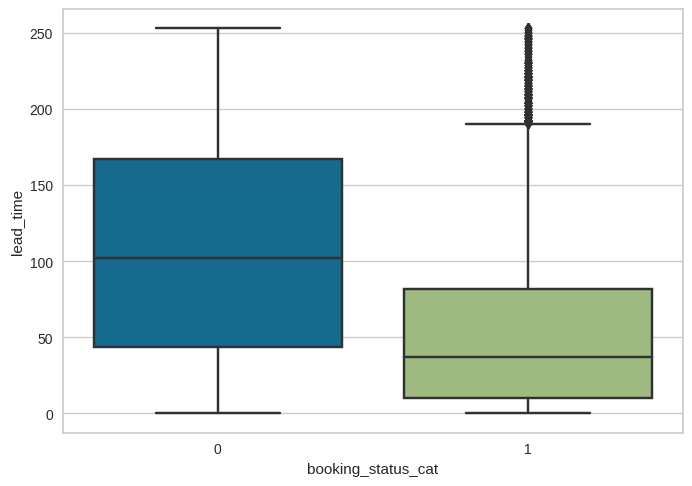

In [ ]:
#Gráfico de boxplot para la variable luego del tratamiento para la reducción de valores outliers
sns.boxplot(df_hotel_clean_data, x='booking_status_cat', y="lead_time")

**Conclusión:** al comparar el boxplot de dos gráficos, la cual el de antes de realizar la detección de outliers, se observó muchos valores atípicos y el segundo gráfico donde se observa que ha sido eliminado la mayor parte de los valores extremos, mejorando los datos para realizar el siguiente paso que sería Machine Learning, ya que si poseían datos atípicos, no iba a dar buenos resultados para modelo de entrenamiento y test (**malos datos generan malos modelos**)

# IX) INSIGHTS

## a) ¿Cuántas reservas no canceladas y canceladas se hicieron en los años 2017-2018?

In [ ]:
reserva = df_hotel[['arrival_year','booking_status']].groupby(by='arrival_year').count()
reserva

,booking_status
arrival_year,
2017,6514
2018,29761


In [ ]:
total_reservas = df_hotel['Booking_ID'].count()
total_reservas

36275

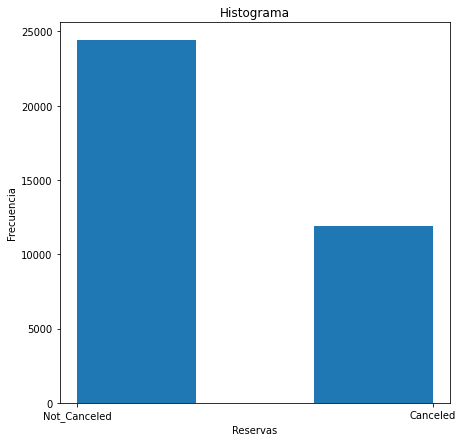

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.hist(df_hotel['booking_status'], bins=3)
ax.set_title('Histograma')
ax.set_xlabel('Reservas')
ax.set_ylabel('Frecuencia')
plt.show()

In [ ]:
ano_reserva = df_hotel['arrival_year'].value_counts()

Text(0.5, 1.0, 'Porcentaje de reservas distribuido por año: 2017 y 2018')

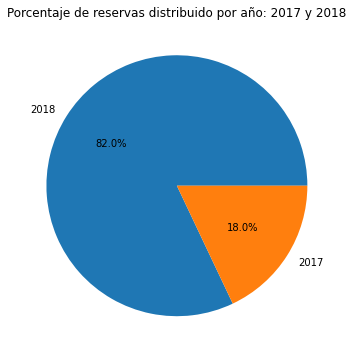

In [ ]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(ano_reserva.values, labels = ano_reserva.index, autopct='%1.1f%%')
ax.set_title('Porcentaje de reservas distribuido por año: 2017 y 2018')

Text(0.5, 1.0, 'Total Reservas')

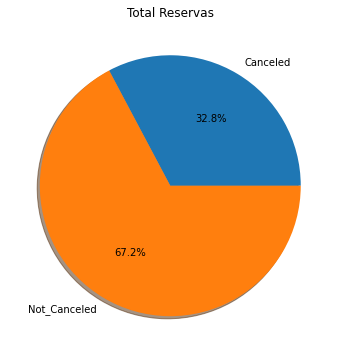

In [ ]:
booking_status_count = df_hotel.groupby('booking_status')['Booking_ID'].count().reset_index()
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(booking_status_count.Booking_ID.values, labels=booking_status_count.booking_status.values, autopct='%1.1f%%', shadow=True)
ax.set_title('Total Reservas')

In [ ]:
booking_status_count

,booking_status,Booking_ID
0,Canceled,11885
1,Not_Canceled,24390


**Conclusión:**



*   **El total de las reservas de los años 2017 y 2018 fue: 36.275**



*   En el año 2017 se hicieron 6514 reservas y en el año 2018 se hicieron 29761 reservas.

*   De acuerdo al total de reservas del período 2017-2018: el 18% de las reservas corresponde al año 2017 y el 82% de las reservas corresponde al año 2018.
*   De acuerdo al total de reservas del período 2017-2018: el 67,2% (24390) de las reservas fue confirmadas y 32,8% (11885) de las reservas fue canceladas.


*   La tasa de cancelación es bastante alta. Se cancelan 11.885 de 36.275 reservas, es decir, el 32,8% de las reservas. Desafortunadamente, no hay datos que puedan explicar por qué los clientes cancelan sus reservas.









## b) ¿Cómo fue la situación de las reservas en el año 2017 y 2018?




*   **Estudio de reservas de Hotel del año 2017**





In [ ]:
reserva_2017 = df_hotel[df_hotel['arrival_year'] == 2017][['arrival_year', 'booking_status']].groupby(by='booking_status').count()
reserva_2017

,arrival_year
booking_status,
Canceled,961
Not_Canceled,5553


Text(0.5, 1.0, 'Porcentaje de reservas no canceladas y canceladas del año 2017')

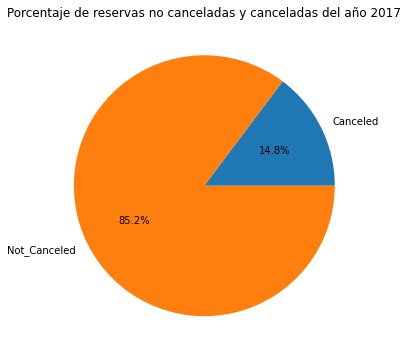

In [ ]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(reserva_2017['arrival_year'], labels = reserva_2017.index, autopct='%1.1f%%')
ax.set_title('Porcentaje de reservas no canceladas y canceladas del año 2017')

In [ ]:
reservas_month_2017= df_hotel[df_hotel['arrival_year'] == 2017][['arrival_year', 'arrival_month']].groupby(by='arrival_month').count()
reservas_month_2017

,arrival_year
arrival_month,
7,363
8,1014
9,1649
10,1913
11,647
12,928


**Conclusiones sobre la situación de las reservas del año 2017:**


*   En el año 2017 hubo **5553 reservas confirmadas** la cual corresponde el 85,2% y **961 reservas canceladas** la cual corresponde el 14,8%
*   Se observa que los clientes realizó reservas mayormente en los meses Septiembre y Octubre





**Estudio de reservas de Hotel del año 2018**



In [ ]:
reserva_2018 = df_hotel[df_hotel['arrival_year'] == 2018][['arrival_year', 'booking_status']].groupby(by='booking_status').count()
reserva_2018

,arrival_year
booking_status,
Canceled,10924
Not_Canceled,18837


Text(0.5, 1.0, 'Porcentaje de reservas no canceladas y canceladas del año 2018')

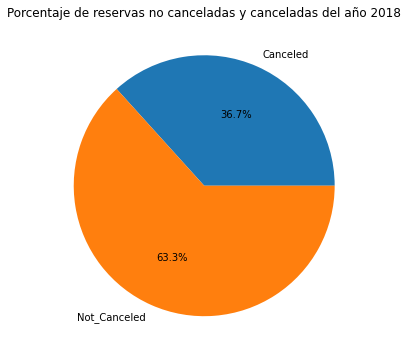

In [ ]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(reserva_2018['arrival_year'], labels = reserva_2018.index, autopct='%1.1f%%')
ax.set_title('Porcentaje de reservas no canceladas y canceladas del año 2018')


In [ ]:
reservas_month_2018= df_hotel[df_hotel['arrival_year'] == 2018][['arrival_year', 'arrival_month']].groupby(by='arrival_month').count()
reservas_month_2018

,arrival_year
arrival_month,
1,1014
2,1704
3,2358
4,2736
5,2598
6,3203
7,2557
8,2799
9,2962


**Conclusiones sobre la situación de las reservas del año 2018:**


*   En el año 2018 hubo **18837 reservas confirmadas** la cual corresponde el 63,3% y **10924 reservas canceladas** la cual corresponde el 36,7%



**Comparando la situación de los años mencionados, se puede observar que en el año 2018 tiene mayor tasa de reservas canceladas con respecto al año 2017.**

## c) ¿El precio medio por habitación es un factor que incide en las reservas?

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

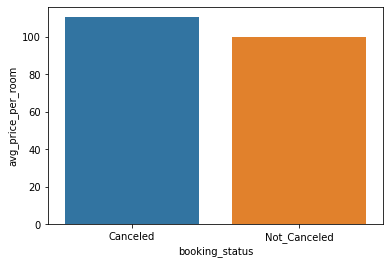

In [ ]:
average_price = df_hotel.groupby('booking_status')['avg_price_per_room'].mean().reset_index()
sns.barplot(data=average_price, x="booking_status", y="avg_price_per_room")

In [ ]:
average_price

,booking_status,avg_price_per_room
0,Canceled,110.589966
1,Not_Canceled,99.931412


**Conclusión:** Se observa que el precio medio por habitación cancelada es ligeramente superior al precio medio por habitación no cancelada

## d) ¿El plazo de reserva influye en la tasa de cancelación?

<Axes: xlabel='booking_status', ylabel='lead_time'>

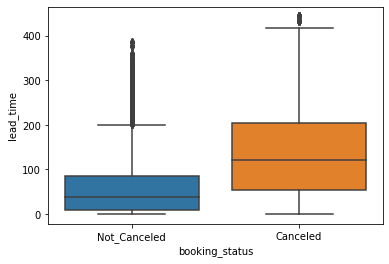

In [ ]:
tiempo_reserva = sns.boxplot(df_hotel, x='booking_status', y="lead_time")
tiempo_reserva

**Conclusión:** A mayor plazo, mayor tasa de cancelación

## e) ¿En qué mes o meses ocurrió la mayor tasa de cancelación de los años 2017-2018?

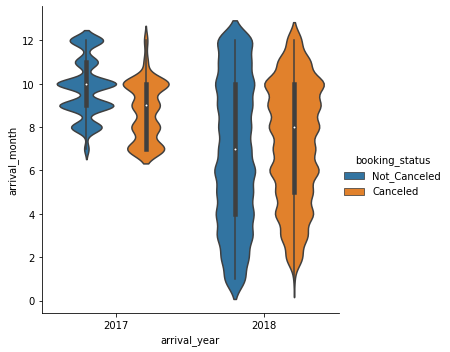

In [ ]:
z = sns.catplot(df_hotel, x='arrival_year', y="arrival_month", hue='booking_status', kind='violin')
z

**Conclusión:** En los meses 7-8 de 2017 hay mayor tasa de cancelación mientras que a principios de 2018 hay menor tasa de cancelación

## f) ¿En qué segmento o por dónde realizan los clientes las reservas?

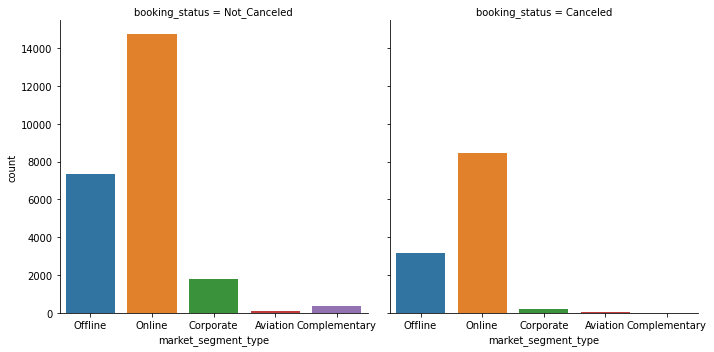

In [ ]:
market_segment = sns.catplot(df_hotel, x="market_segment_type", col='booking_status', kind='count')
market_segment

**Conclusión:** Los clientes realizan las reservas mayormente por online, seguido Offline.

## g) ¿Que tipo de solicitud especial fue mayor en las reservas confirmadas y canceladas de los años 2017-2018?

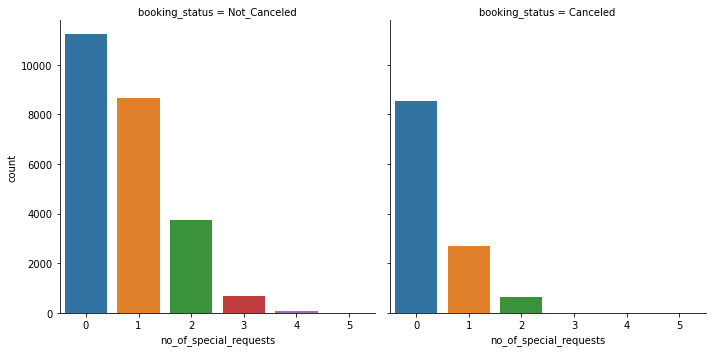

In [ ]:
request_special = sns.catplot(df_hotel, x="no_of_special_requests", col='booking_status', kind='count')
request_special

**Conclusión:** Se puede apreciar que cuando los clientes tienen peticiones especiales hay menor tasa de cancelación de reservas. Los clientes que cancelan las reservan son mayormente los que no piden solicitudes especiales

# V) Machine Learning: Predictive Models

*   Primero antes de continuar los pasos siguientes vamos a utilizar el LabelEncoder para transformar nuestras variables categóricas en variables numéricas



In [ ]:
#Realizo label encoder para las tres columnas: "type_of_meal_plan", "room_type_reserved", "market_segment_type"
label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()


df_hotel_1['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df_hotel_1['type_of_meal_plan'])
df_hotel_1['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df_hotel_1['room_type_reserved'])
df_hotel_1['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df_hotel_1['market_segment_type'])


In [ ]:
#Muestro los resultados que apliqué label encoder a las columnas mencionadas anteriormente
df_hotel_1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_cat
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


### Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [ ]:
X = df_hotel_1.drop('booking_status_cat', axis = 1) #Variables carasteristicas o features
X = X.values
y = df_hotel_1['booking_status_cat'] #Variable objetivo o target

*   **Equilibrar Clases:**
Como tenemos muchos valores de una clase y pocos valores de otras, equilibraremos las clases utilizando OverSampling para que las clases estén equilibradas


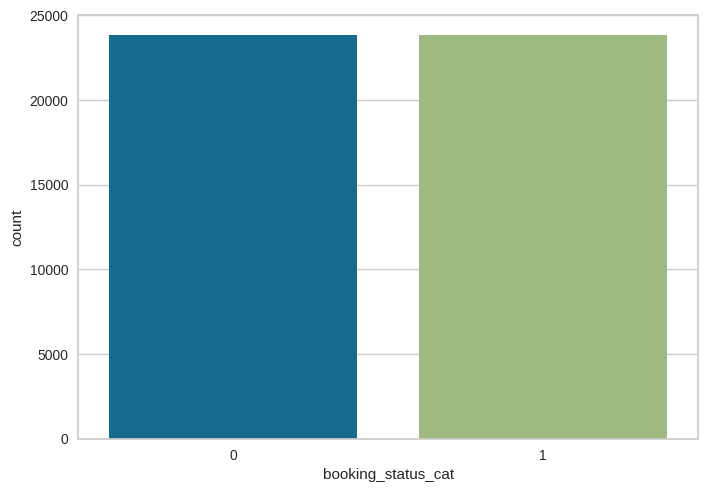

In [ ]:
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

*   **StandardScaler:**
Aquí usaremos StandardScaler para poner nuestros datos en la misma escala



In [ ]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)



*   **Transformación de datos en Train e Test, aquí utilizaremos el 30% de nuestros datos para probar los modelos de aprendizaje automático.**



In [ ]:
#Crearemos las variables predictoras y objetivo para conjuntos de datos de test y training
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## **MODELOS**

***Para probar diferentes modelos, usamos todas las variables carasterísticas (no aplico feature selection)***

### **Naive Bayes:** Supervised Learning Model

Ejecutando el Modelo Gaussiano: aquí usaremos el Modelo Naive Bayes, probaremos el modelo Gaussiano, usando nuestros Datos Normales

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

In [ ]:
#calcular la precisión de las predicciones realizada por el modelo Naive Bayes
classification_naive_bayes = (accuracy_score(y_test, previsoes))
classification_naive_bayes

0.5638119227539883

**Conclusión:** el resultado de la precisión de las predicciones realizada por este modelo no es bueno para aplicar y se comprobará mediante la validación del modelo.

*Validación del modelo:*



*   **Confussion Matrix**



0.5638119227539883

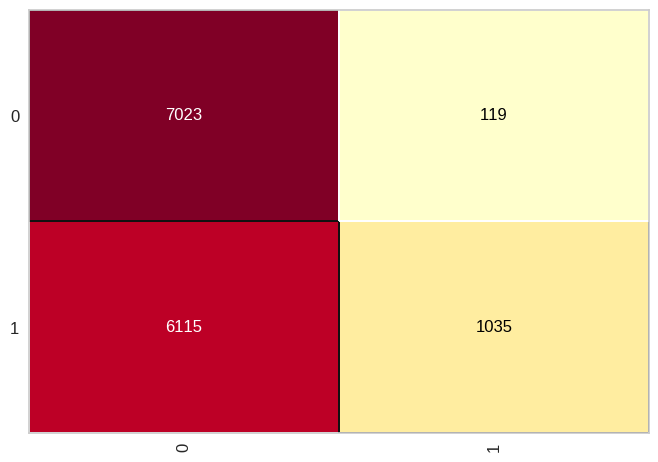

In [ ]:
#Realizaremos el gráfico de confussion Matrix para que nos proporcione un resumen visual de la calidad de las predicciones realizadas por un modelo de clasificación
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

**Conclusión:** Tuvimos un 56,38% de precisión, definitivamente no es un buen modelo, aprendió mucho para predecir las reservas que se cancelarán pero prácticamente no aprendió las que no.

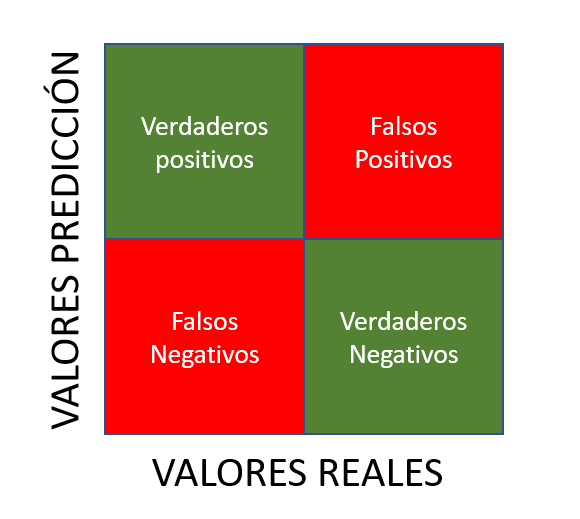

**Verdadero positivo:** El valor real es positivo y  la prueba predijo tambien que era positivo.

**Verdadero negativo:** El valor real  es negativo y la prueba predijo tambien que el resultado era negativo.

**Falso negativo:** El valor real es positivo, y la prueba predijo  que el resultado es negativo. Esto es lo que en estadística se conoce como error tipo II

**Falso positivo:** El valor real es negativo, y la prueba predijo  que el resultado es positivo. Esto es lo que en estadística se conoce como error tipo I



*   **Score F1**



In [ ]:
#Realizamos el test F1 para el modelo aplicado (Naive Bayes)
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.53      0.98      0.69      7142
           1       0.90      0.14      0.25      7150

    accuracy                           0.56     14292
   macro avg       0.72      0.56      0.47     14292
weighted avg       0.72      0.56      0.47     14292



**Conclusión:**

•	En la **clase 0** tenemos BAJA precisión y ALTO recall: por tanto nuestro modelo no detecta la clase muy bien, pero también incluye muestras de otra clase.

•	En la **clase 1** tenemos ALTA precisión y BAJO recall, por lo tanto nuestro algoritmo  no detecta bien la clase,  pero pero cuando lo hace es altamente confiable.

El Score f1 es del 56%,  lo que se considera apenas aceptable




*   **Cross-Validation**


In [ ]:
# puntuar por precisión significa simplemente puntuar por el porcentaje de predicciones correctas
scores = cross_val_score(naive_bayes, X, y, cv=4, scoring='accuracy')
print('Mean accuracy of {:.1f}%'.format(scores.mean()*100))

Mean accuracy of 55.7%


**Conclusión:** Esta accuracy de 55,7% es bastante mala, lo que significa que el modelo elegido no es aceptable.

### **K-Means:** Unsupervised Learning Model

In [ ]:
model = KMeans(n_clusters = 2, random_state= 0, n_init=10)
model.fit(X_train)
previsoes = model.predict(X_test)

In [ ]:
##calcular la precisión de las predicciones realizada por el modelo K-means
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
classification_kmeans_standard

0.3343129023229779

**Conclusión:** 33.43% de precisión, no es un buen modelo

### **Logistic Regression:** Supervised Learning Model

***Clasificación con todas las features***

Para empezar, vamos a ver lo bueno que es este conjunto de datos para la clasificación y utilizar todos los datos disponibles para hacer la clasificación. El modelo será de "regresión multinomial" y utilizaremos la confussion matrix como validación del modelo y también probaremos cross-validation como alternativa, ya que tenemos un conjunto de datos muy grande.

In [ ]:
logistic = LogisticRegression(random_state = 1000, max_iter=10000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

In [ ]:
#calcular la precisión de las predicciones realizada por el modelo Logistic Regression
classification_logistic_regression = (accuracy_score(y_test, previsoes))
classification_logistic_regression

0.7660929191155892

**Conclusión:** el resultado de la precisión de las predicciones realizada por este modelo es bueno para aplicar y se comprobará mediante la validación del modelo.

*Validación del modelo:*



*   **Confussion Matrix**



0.7660929191155892

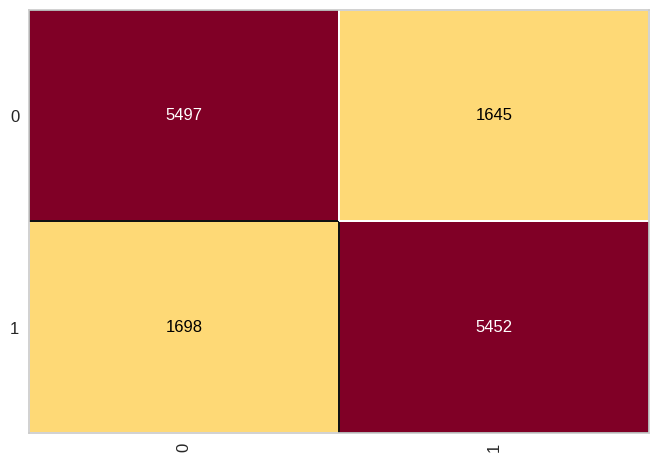

In [ ]:
#Realizaremos el gráfico de confussion Matrix para que nos proporcione un resumen visual de la calidad de las predicciones realizadas por un modelo de clasificación
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

**Conclusión:** Tuvimos un 76,61% de precisión, definitivamente no es un mal modelo, pero tampoco la mejor



*   **Score F1**



In [ ]:
# Validación de Modelo por test F1
classification_logistic_regression = (classification_report(y_test, previsoes))
print(classification_logistic_regression)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      7142
           1       0.77      0.76      0.77      7150

    accuracy                           0.77     14292
   macro avg       0.77      0.77      0.77     14292
weighted avg       0.77      0.77      0.77     14292



**Conclusión:**

• En la clase 0 tenemos ALTA precisión y ALTO recall: el modelo escogido maneja perfectamente esa clase

• En la clase 1 tenemos ALTA precisión y ALTO recall: el modelo escogido maneja perfectamente esa clase

El Score f1 es del 77%, lo que se considera aceptable el modelo de logistic regression



*   **Cross-Validation**


In [ ]:
# puntuar por precisión significa simplemente puntuar por el porcentaje de predicciones correctas
scores = cross_val_score(logistic, X, y, cv=4, scoring='accuracy')
print('Mean accuracy of {:.1f}%'.format(scores.mean()*100))

Mean accuracy of 76.5%


**Conclusión:** Esta accuracy de 76,5% es bastante buena, lo que significa que el modelo elegido es aceptable.

### **Random Forest Classifier:** Supervised Learning Model

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')
rfc.fit(X_train, y_train)
previsoes = rfc.predict(X_test)

In [ ]:
#calcular la precisión de las predicciones realizada por el modelo Random Forest Classifier
classification_random_forest = (accuracy_score(y_test, previsoes))
classification_random_forest

0.9247131262244612

**Conclusión:** el resultado de la precisión de las predicciones realizada por este modelo es excelente para aplicar y se comprobará mediante la validación del modelo.

In [ ]:
#Calcular la precisión de las predicciones de test data y training data
#train data
rfc_predict_train = rfc.predict(X_train)
print("Accuracy over Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rfc_predict_train)))
#training data
rfc_predict_test = rfc.predict(X_test)
print("Accuracy over Testing data: {0:.4f}".format(metrics.accuracy_score(y_test, rfc_predict_test)))

Accuracy over Training data: 0.9727
Accuracy over Testing data: 0.9247


*Validación del modelo:*



*   **Confussion Matrix**



0.9247131262244612

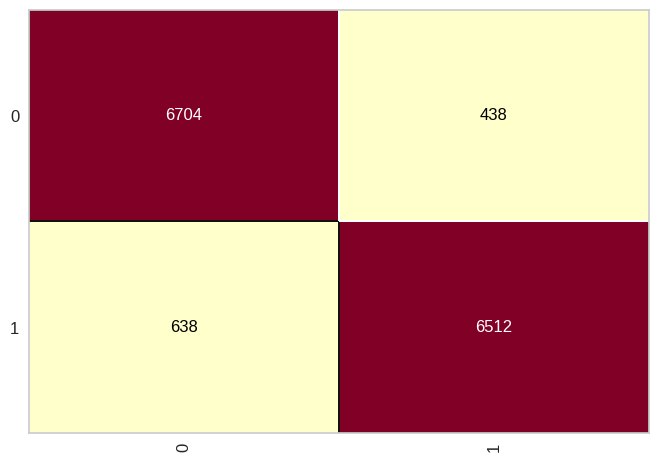

In [ ]:
#Realizaremos el gráfico de confussion Matrix para que nos proporcione un resumen visual de la calidad de las predicciones realizadas por un modelo de clasificación
cm = ConfusionMatrix(rfc)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

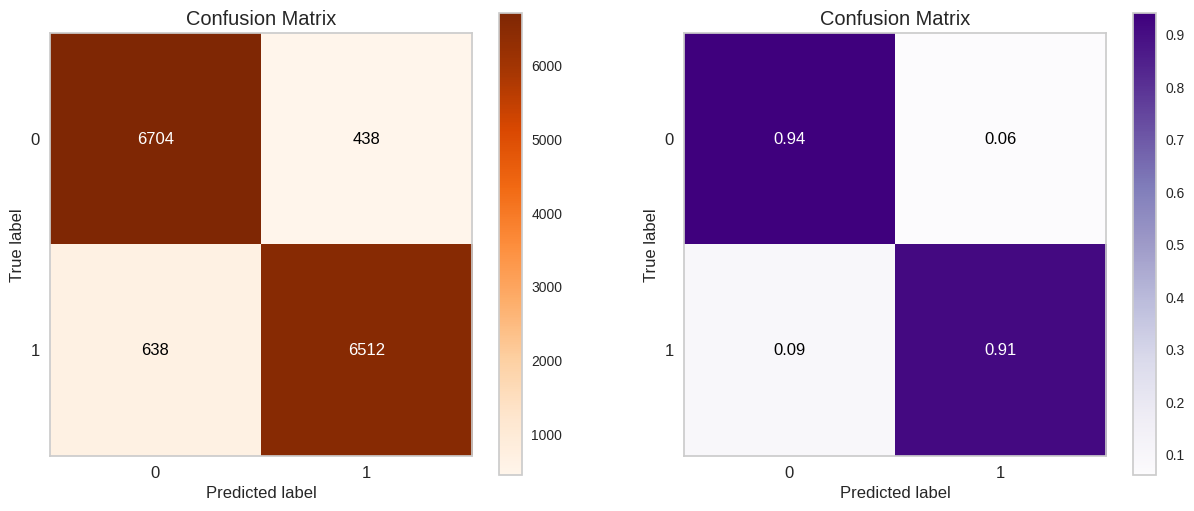

In [ ]:
#Otro gráfico alternativo de confussion matrix
Y_predict = rfc.predict(X_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, Y_predict,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, Y_predict,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

**Conclusión:** Tuvimos un 92,47% de precisión, definitivamente es el mejor modelo, aprendió mucho para predecir tanto las reservas que se cancelarán pero las que no se van a cancelar.



*   **Score F1**



In [ ]:
# Validación de Modelo por test F1
classification_random_forest = (classification_report(y_test, previsoes))
print(classification_random_forest)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7142
           1       0.94      0.91      0.92      7150

    accuracy                           0.92     14292
   macro avg       0.93      0.92      0.92     14292
weighted avg       0.93      0.92      0.92     14292



Conclusión:

• En la clase 0 tenemos ALTA precisión y ALTO recall: el modelo escogido maneja perfectamente esa clase

• En la clase 1 tenemos ALTA precisión y ALTO recall: el modelo escogido maneja perfectamente esa clase

El Score f1 es del 92% se considera bastante alta y sugiere que el modelo tiene un rendimiento sólido en términos de su capacidad para clasificar correctamente las muestras

Una puntuación f1 del 92% indica que el modelo tiene un buen equilibrio entre identificar correctamente los casos positivos y minimizar los falsos positivos.




*   **Cross-Validation**


In [ ]:
# puntuar por precisión significa simplemente puntuar por el porcentaje de predicciones correctas
scores = cross_val_score(rfc, X, y, cv=4, scoring='accuracy')
print('Mean accuracy of {:.1f}%'.format(scores.mean()*100))

Mean accuracy of 93.6%


**Conclusión:** Esta accuracy de 93,6% es bastante buena, lo que significa que, de acuerdo al modelo elegido, se puede concluir que el modelo tiene un rendimiento sólido y generalmente se ajusta bien a los datos

* **Gráfico:** Cross Validation Score y Training Score




**Este gráfico muestra la curva de aprendizaje de un modelo de clasificación utilizando validación cruzada. Esta curva proporciona información sobre cómo el rendimiento del modelo varía a medida que se incrementa el tamaño del conjunto de entrenamiento.**

<Axes: title={'center': 'Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

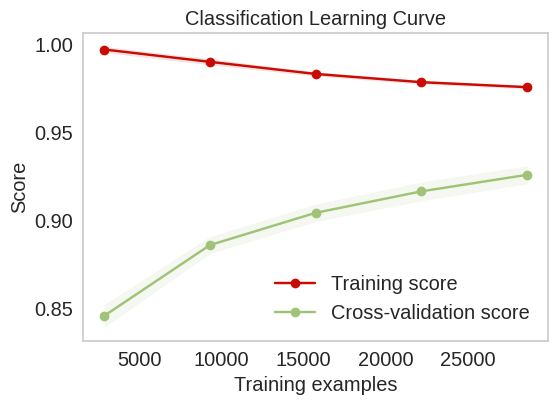

In [ ]:
skplt.estimators.plot_learning_curve(rfc, X_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve")

**Conclusión:** Basada en el gráfico es que el modelo muestra un rendimiento creciente a medida que aumenta el tamaño del conjunto de datos, lo que sugiere que el modelo se beneficia de un mayor número de ejemplos de entrenamiento y tiene una mayor capacidad de generalización (a medida que aumenta el tamaño del conjunto de datos se evita el overfitting o sobreajuste de los datos)

* Carasterísticas más importantes en el entrenamiento del modelo

<Axes: title={'center': 'Random Forest Regressor Feature Importance'}>

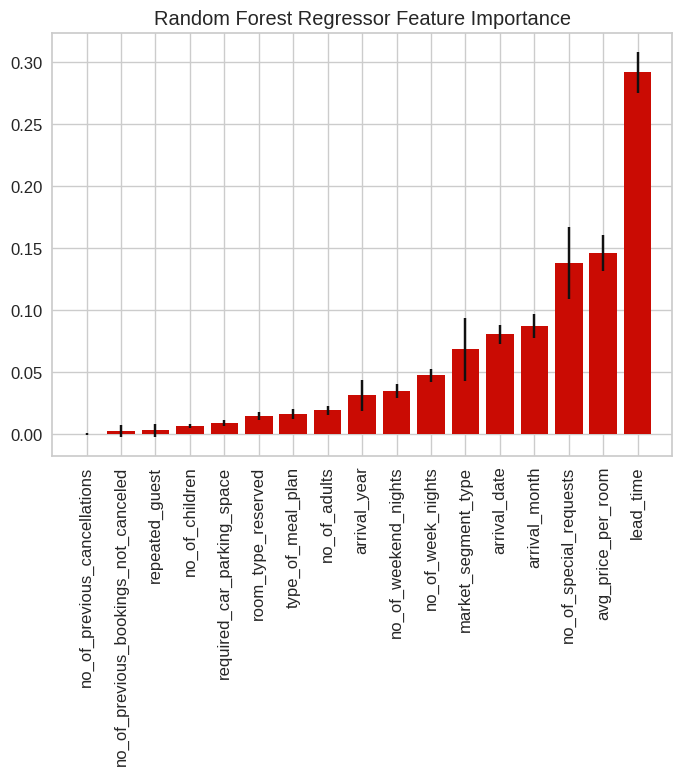

In [ ]:
#Gráfico de barras para observar el grado de importancias de las variables para el algoritmo Random Forest
skplt.estimators.plot_feature_importances(rfc, feature_names=df_hotel_1.columns.to_list(),
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending")

**Conclusión:** De acuerdo al gráfico se observa el grado de importancia en forma ascendente de las variables para el algoritmo de Random Forest, de las cuales la más importantes es la variable **lead_time**

## ***A continuación voy aplicar feature selection:***

### **chi square χ2**

Utilizaremos la prueba estadística chi-cuadrado para elegir las dos mejores características con mayor correlación con la variable objetivo:

In [ ]:
#Creo una variable que sea igual a 2, lo que nos servirá para buscar las dos mejores carasterística
n_features = 2

In [ ]:
chi2_best = SelectKBest(chi2, k=n_features)

X_ch2 = chi2_best.fit_transform(X, y)

# esta es una forma relativamente sencilla de llegar a los dos indices más altos
max_indx = pd.Series(np.argsort(chi2_best.scores_), name='score')\
                    .nlargest(n=n_features).\
                    index.values

print('Las mejores carasterísticas de la prueba de Chi2 son:\n')

#Este código utiliza un bucle for para iterar a través de un rango de valores que va desde 0 hasta n_features - 1.
#Dentro del bucle for, se utiliza la función print() para mostrar en la consola una cadena de texto formateada.
#La cadena de texto formateada contiene dos elementos separados por un punto.
#El primer elemento es una cadena de texto que muestra el índice actual del bucle for, incrementado en 1 (i+1).
#El segundo elemento es otra cadena de texto que representa el nombre de una columna del dataframe "df_hotel_1".
#El nombre de la columna se obtiene utilizando el valor de la variable max_indx, que se supone que es una lista
#que contiene los índices de las columnas en el dataframe "df_hotel_1" ordenados de mayor a menor importancia.
#Como el índice en la lista comienza en cero, se suma 1 al valor de max_indx[i] antes de buscar el nombre de la columna en el dataframe.
#En resumen, este código imprime en la consola una lista numerada de las columnas del dataframe "df_hotel_1" ordenadas por importancia,
#según los índices contenidos en la lista max_indx.
for i in range(n_features):
    print('{}. {}'.format(i+1, df_hotel_1.columns[max_indx[i] + 1]))

Las mejores carasterísticas de la prueba de Chi2 son:

1. no_of_previous_bookings_not_canceled
2. no_of_special_requests


### **Mutual information**

**Podemos hacer lo mismo, mirando la información mutua y eligiendo las variables de información mutua con el objetivo:**

In [ ]:
#Información mutua estimada entre cada característica y las etiquetas
mu_score = mu_clsf(X, y, random_state=613)

max_indx = pd.Series(np.argsort(mu_score), name='mi_score')\
                    .nlargest(n=n_features).\
                    index.values

print('Las mejores características de los criterios de información mutua son:')

for i in range(n_features):
    print('{}'.format(df_hotel_1.columns[max_indx[i] + 1]))

# Extraer las columnas relevantes
X_mi = X[:, [max_indx[0], max_indx[1]]]

Las mejores características de los criterios de información mutua son:
avg_price_per_room
booking_status_cat


In [ ]:
X_mi.shape

(47640, 2)

***Entonces, ¿cuál es?***
**Entre estas dos, chi2 e mutual information, ¿cuál es la mejor para la clasificación? Creemos un modelo para cada una de ellas y veamos su poder predictivo:**

In [ ]:
# Calcular la métrica de chi2
scores = cross_val_score(logistic, X_ch2, y, cv=4, scoring='accuracy')
print('Chi2 mean accuracy: {:.1f}%'.format(scores.mean()*100))

Chi2 mean accuracy: 67.6%


**Conclusión:** La precisión de chi2 es de 67,6%

In [ ]:
# Calcular la métrica de mutual information
scores = cross_val_score(logistic, X_mi, y, cv=4, scoring='accuracy')
print('Mutual-information mean accuracy: {:.1f}%'.format(scores.mean()*100))

Mutual-information mean accuracy: 63.9%


**Conclusión:** La precisión de mutual information es de 63,9%

**Respuesta:**

Así pues, el criterio de selección de **Test chi2** (67,6%) es mejor que **mutual information** (63,9%) con una diferencia de casi 4% en este caso. Sin embargo, la diferencia es poca y no se puede llegar a una conclusión significativa.

Con respecto a las diferencias entre usar todas las variables carasterísticas y al aplicar feature selection, la cual para el caso de:
* modelo logistic regression dió el 76,5%, es sólo casi un 10% menos que utilizar todas las características a la vez, lo que indica que no está muy bien y se recomienda usar todas las variables carasterísticas.

* modelo Random forest dió el 92,47%, la cual es 30% menos que utilizar todas las características a la vez, lo que indica que no está muy bien y se recomienda usar todas las variables carasterísticas.

### **PCA (Principle components analysis)**

Para continuar nuestra búsqueda de un espacio de características más pequeño, apliquemos el análisis de componentes principales (PCA). El PCA requiere una estandarización de las características (la cual ya hemos estandarizado que se encuentra en la sección Machine Learning)

*   *Ahora, apliquemos la transformación PCA para el espacio de características:*

In [ ]:
pca = PCA(n_components=X_standard.shape[1]) # utiliza todas las features
X_trans_18 = pca.fit_transform(X_standard)

*   **Trazar la varianza explicada:**






La "varianza explicada" cuantifica qué parte de la varianza de los datos explica cada "nuevo" espacio de características. En el siguiente gráfico, muestro esta cantidad en función del número de características PCA:

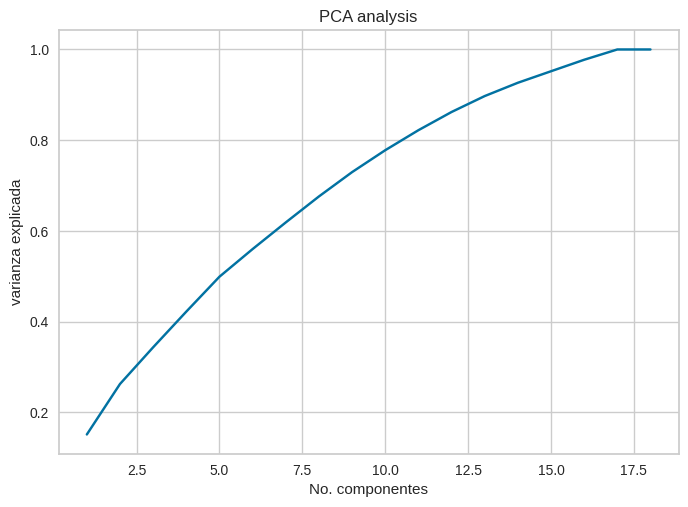

In [ ]:
comp_n_axis = np.arange(1, 19)
variance_axis = list()
for i in range(18):
    variance_axis.append(pca.explained_variance_ratio_[0:i+1].sum())

plt.title('PCA analysis')
plt.ylabel('varianza explicada')
plt.xlabel('No. componentes')
plt.plot(comp_n_axis, variance_axis);

La varianza explicada alcanza el 90% con unos 14 componentes, pero sólo el 25% con dos componentes. Sin embargo, procedamos con sólo dos características. Una de las ventajas del PCA es que permite cuantificar la importancia relativa de cada una de las características transformadas en función de sus valores singulares.

*   **Ahora, veremos la métrica de evaluación para PCA:**




In [ ]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_standard)

In [ ]:
scores = cross_val_score(logistic, X_pca_2, y, cv=4, scoring='accuracy')
print('PCA2 mean accuracy: {:.1f}%'.format(scores.mean()*100))

PCA2 mean accuracy: 63.8%


Con sólo dos características podemos obtener un 63,8% en comparación con el 67,6% seleccionado por el criterio de Test chi2. Sin embargo, no es una comparación justa porque el PCA crea nuevas características combinando datos de todas las características en cada una de las transformadas, de modo que las nuevas características contienen más información.

# VI) Conclusión General

En el dataset podemos ver que todos nuestros datos son numéricos y continuos y tenemos una cantidad considerable de datos y cuando miramos los datos no hay valores nulos lo que facilita mucho el trabajo y no es necesario realizar tratamiento.

Mirando la correlación, podemos ver que no hay una correlación fuerte entre nuestros datos. Cuando miramos nuestro EDA podemos ver que tenemos valores atípicos la cual en la sección de detección outliers se hizo tratamiento a la variable "lead_time" en la que se eliminó los datos atípicos muy extremos y quedaron algunos.

También podemos notar algunos patrones interesantes en nuestros datos en relación a las reservas, generalmente la mayoría de los datos tienen un patrón en las reservas, observando nuestra **variable objetivo "booking_status"** también podemos observar algunos patrones en las reservas que se cancelan o no, la más importante es la **variable "lead_time"**, generalmente las reservas con un lead_time alto son más propensas a cancelarse, también tenemos otros datos interesantes, los huéspedes que se han alojado anteriormente y los huéspedes que solicitan una plaza de coche o hacen peticiones especiales también son menos propensos a cancelar.
Cuando nos fijamos en la variable Lead_Time, podemos ver un comportamiento similar a la variable Target, en general el mismo patrón de no cancelación tuvo un lead_time más corto, pero tenemos algunas especificidades, como en los 3 primeros y los 3 últimos meses del año el lead_time es menor. Cuando lo comparamos con la variable coste medio de la habitación podemos ver que cuanto mayor es el precio de la habitación, y cuanto mayor es el lead_time, más probable es la cancelación de la habitación. Por último también se observó que las reservas canceladas provino mayormente de las personas que reservan de manera online.